In [5]:
import torch
from helper import *

There are two modes in linear quantization
- asymmetric mode - we map (rmin, rmax) to (qmin, qmax)
- symmetric mode - we map (-rmax, rmax) to (-qmax, qmax)

$q = int(round(r / s))$

$s = rmax / qmax$

In [2]:
def get_q_scale_symmetric(tensor, dtype):
    r_max = torch.max(torch.abs(tensor)).item()
    q_max = torch.iinfo(dtype).max
    return r_max / q_max

In [3]:
test_tensor = torch.randn((4, 4))

In [4]:
get_q_scale_symmetric(test_tensor, torch.int8)

0.013323321117190864

In [7]:
def linear_q_symmetric(tensor, dtype):
    scale = get_q_scale_symmetric(tensor, dtype)
    quantized_tensor = linear_q_with_scale_zero_point(tensor, scale=scale, zeropoint=0)
    return quantized_tensor, scale

In [8]:
quantized_tensor, scale = linear_q_symmetric(test_tensor, torch.int8)

In [9]:
dequantized_tensor = linear_dequantization(quantized_tensor, scale=scale, zero_point=0)

In [10]:
from helper import plot_quantization_error

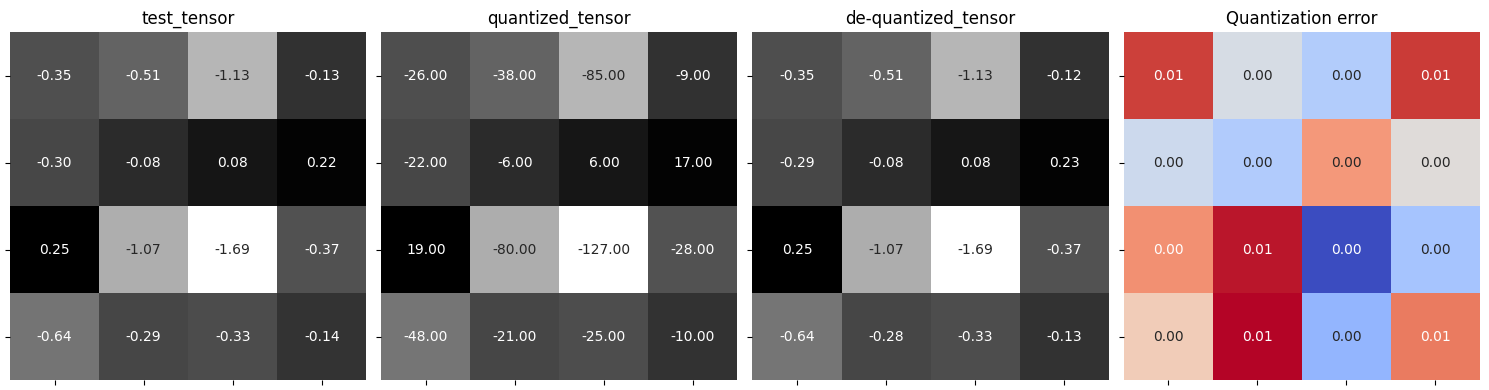

In [11]:
plot_quantization_error(test_tensor, quantized_tensor, dequantized_tensor)